In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import gzip

## Loading the Data
The below functions are provided directly from the [Amazon Review Data link](http://jmcauley.ucsd.edu/data/amazon/) by the author and it is used to load the [5-cores](https://en.wikipedia.org/wiki/Degeneracy_(graph_theory)) book reviews as a `panda dataframe`.

In [4]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

In [6]:
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [10]:
df = getDF('/Users/falehalrashidi/Downloads/reviews_Books_5.json.gz')

I used the below snippet to monitor the memory requirements for the loading. 

In [8]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


Below you can see the fields loaded and a count of the values per field;

In [25]:
df.count()

reviewerID        8898041
asin              8898041
reviewerName      8872495
helpful           8898041
reviewText        8898041
overall           8898041
summary           8898041
unixReviewTime    8898041
reviewTime        8898041
dtype: int64

A sample of the overal data appears next:

In [24]:
df[0:100]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5.0,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5.0,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5.0,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5.0,A Modern Rumi,1033948800,"10 7, 2002"
5,A3V1MKC2BVWY48,000100039X,Alex Dawson,"[0, 0]",Reading this made my mind feel like a still po...,5.0,This book will bring you peace,1390780800,"01 27, 2014"
6,A12387207U8U24,000100039X,Alex,"[0, 0]","As you read, Gibran's poetry brings spiritual ...",5.0,Graet Work,1206662400,"03 28, 2008"
7,A29TRDMK51GKZR,000100039X,Alpine Plume,"[0, 0]","Deep, moving dramatic verses of the heart and ...",5.0,Such Beauty,1383436800,"11 3, 2013"
8,A3FI0744PG1WYG,000100039X,"Always Reading ""tkm""","[0, 0]",This is a timeless classic. Over the years I'...,5.0,The Prophet,1390953600,"01 29, 2014"
9,A2LBBQHYLEHM7P,000100039X,"Amazon Customer ""Full Frontal Nerdity""","[0, 0]",An amazing work. Realizing extensive use of Bi...,5.0,A Modern Classic,1379808000,"09 22, 2013"


## Column Fields of Interest
In general, the loaded dataframe, include 7 fields:
* `reviewerID: A `String` (probably a hashText) that uniquely identifies the user that submitted the review.     
* `asin`: ASIN stands for **Amazon Standard Identification Number**. Almost every product on **Amazon** has its own **ASIN**, a unique code used to identify it. For books, the **ASIN** is the same as the book's **ISBN** number.       
* `reviewerName`: The name of the reviewer.       
* `helpful`: Amazon has implemented an interface that allows customers to vote on whether a particular review
has been helpful or unhelpful. This is captured by this field, which represents a rating of the review, e.g. if `[2,3] --> 2/3`. 
* `reviewText`: The actual review provided by the reviewer.         
* `overall`: The product's rating attributed by the same reviewer.            
* `summary`: A summary of the review.        
* `unixReviewTime`:  Time of the review (unix time).
* `reviewTime`: Time of the review (raw).

Of these fields, for the purposes of this project we care to keep the `reviewerID`, `asin`, `reviewText`, `overall` and `helpful`. Specifically, we keep `reviewerID` only to merge it with `asin` and create unique identifier (`key`) per review, e.g.:

```python
key = reviewerID:`A10000012B7CGYKOMPQ4L` + asin:`000100039X` 
```

`asin` is obviously necessary to identify the distinct books in the dataset, while the rest are necessary for the analysis (`overall`, `reviewText`) and for evaluation (`helpful`) purposes.

 ## Data Inspection

In [45]:
# Number of reviews:
number_of_reviews=len(df)
my_number_string = '{:0,.0f}'.format(number_of_reviews)

print('Number of Reviews: ' + my_number_string + '.')

Number of Reviews: 8,898,041.


In [46]:
# Unique number of items:
unique_books=len(df['asin'].unique())
my_number_string = '{:0,.0f}'.format(unique_books)

print('Number of Books: ' + my_number_string + '.')

Number of Books: 367,982.


### Distribution of ratings amongst all reviews

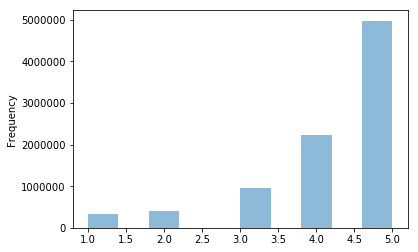

In [53]:
# Distribution of Ratings
df['overall'].plot.hist(alpha=0.5)

In [55]:
df10 = df[['overall','asin']]

In [60]:
df11 = pd.DataFrame(df10.groupby(['asin'])['overall'].mean())

### Distribution of Average Book Ratings

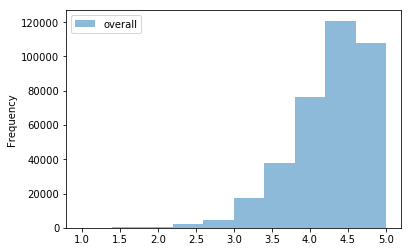

In [62]:
df11.plot.hist(alpha=0.5)

### Books per Year

In [122]:
df20 = df[['asin','reviewTime']]

In [123]:
def get_year(reviewTime):
    day_month_year_list = reviewTime.split(',')
    
    if(len(day_month_year_list)==2): 
        return day_month_year_list[1]
    else:
        return fillna(0)
    

In [124]:
df20['reviewYear'] = pd.DataFrame(df20['reviewTime'].apply(lambda time: get_year(time)))

/Users/falehalrashidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
df20.head()

,asin,reviewTime,reviewYear
0,000100039X,"12 16, 2012",2012
1,000100039X,"12 11, 2003",2003
2,000100039X,"01 18, 2014",2014
3,000100039X,"09 27, 2011",2011
4,000100039X,"10 7, 2002",2002


In [176]:
books_per_year = pd.DataFrame(df20.groupby(['reviewYear']).size())

In [177]:
books_per_year.columns = ['counts']

In [180]:
books_per_year[0:10]

,counts
reviewYear,
1996,25
1997,2041
1998,9731
1999,19574
2000,87855
2001,97068
2002,101028
2003,104329
2004,122834


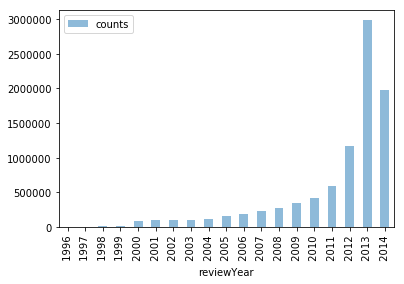

In [181]:
books_per_year.plot.bar(alpha=0.5)

In [182]:
df30 = df[['asin','reviewTime', 'overall']]

In [128]:
df30['reviewYear'] = pd.DataFrame(df30['reviewTime'].apply(lambda time: get_year(time)))

/Users/falehalrashidi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
df30.head()

,asin,reviewTime,overall
0,000100039X,"12 16, 2012",5.0
1,000100039X,"12 11, 2003",5.0
2,000100039X,"01 18, 2014",5.0
3,000100039X,"09 27, 2011",5.0
4,000100039X,"10 7, 2002",5.0


In [155]:
books_per_rating_per_year = df30.groupby(['reviewYear','overall']).size().reset_index(name='counts')

In [158]:
books_per_rating_per_year[0:10]

,reviewYear,overall,counts
0,1996,1.0,1
1,1996,2.0,2
2,1996,3.0,1
3,1996,4.0,6
4,1996,5.0,15
5,1997,1.0,80
6,1997,2.0,132
7,1997,3.0,174
8,1997,4.0,466
9,1997,5.0,1189


In [159]:
pivot_df = books_per_rating_per_year.pivot(index='reviewYear', columns='overall', values='counts')
pivot_df.head()

overall,1.0,2.0,3.0,4.0,5.0
reviewYear,,,,,
1996,1,2,1,6,15
1997,80,132,174,466,1189
1998,509,554,858,2171,5639
1999,1185,1256,2010,3962,11161
2000,3628,4566,9537,21545,48579


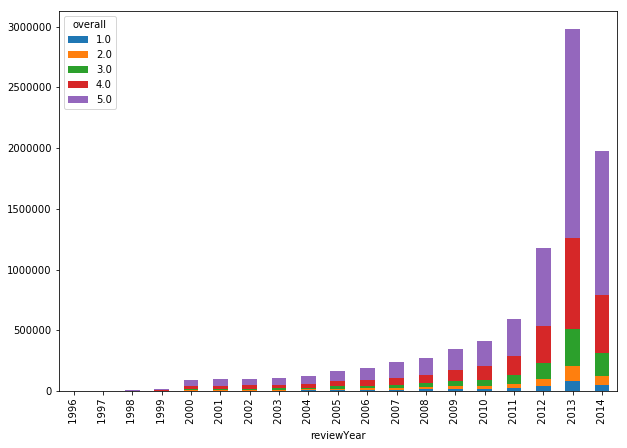

In [162]:
pivot_df.plot.bar(stacked=True, figsize=(10,7))

### Helpfulness 

In [223]:
df40 = df[['asin', 'helpful']]

In [224]:
# Create new Column for the enumerator
df40 = df40.assign(enum = df40['helpful'].apply(lambda enum_denom:enum_denom[0]))

In [225]:
# Create new Column for the denominator
df40 = df40.assign(denom = df40['helpful'].apply(lambda enum_denom:enum_denom[1]))

In [226]:
# Get counts of helpfulness ratings per review
df40 = df40.assign(counts = df40['enum'] + df40['denom'])

In [234]:
# Filter on the counts
df40 = df40.loc[df40['counts'] != 0]

In [238]:
df40[0:15]

,asin,helpful,enum,denom,counts
1,000100039X,"[0, 2]",0,2,2
4,000100039X,"[7, 9]",7,9,16
14,000100039X,"[1, 1]",1,1,2
15,000100039X,"[1, 1]",1,1,2
17,000100039X,"[3, 5]",3,5,8
18,000100039X,"[1, 1]",1,1,2
19,000100039X,"[3, 3]",3,3,6
21,000100039X,"[2, 3]",2,3,5
22,000100039X,"[1, 4]",1,4,5
23,000100039X,"[2, 9]",2,9,11


In [236]:
df40.describe()

,enum,denom,counts
count,4.756837e+06,4.756837e+06,4.756837e+06
mean,5.626327e+00,7.576323e+00,1.320265e+01
std,2.663774e+01,3.052769e+01,5.671008e+01
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00
50%,2.000000e+00,2.000000e+00,4.000000e+00
75%,4.000000e+00,6.000000e+00,1.000000e+01
max,2.331100e+04,2.421200e+04,4.752300e+04


In [242]:
df40.head()

,asin,helpful,enum,denom,counts
1,000100039X,"[0, 2]",0,2,2
4,000100039X,"[7, 9]",7,9,16
14,000100039X,"[1, 1]",1,1,2
15,000100039X,"[1, 1]",1,1,2
17,000100039X,"[3, 5]",3,5,8


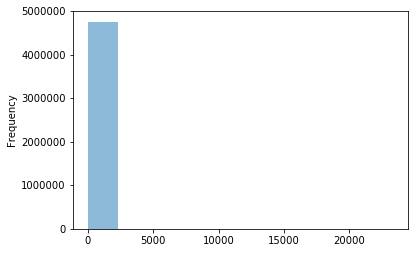

In [244]:
df40['enum'].plot.hist(alpha=0.5)